# Physics 512 - Optics Lab

## Tucker Knaak - Department of Physics, Creighton University - Spring 2022

### Fraunhoffer and Fresnel Diffraction Lab

#### When a wave is incident on an aperture (opening) or an opaque object with a sharp boundary, it is possible to find waves that will travel into the geometrical shadow of the aperture or object. This phenomenon, called diffraction, can be observed for all types of waves, including light itself. Upon close examination one can find bright regions directly behind an illuminated solid object as well as dark fringes in a region that is clearly being illuminated! In this lab you will be investigating two types of diffraction effects. Fraunhofer diffraction which occurs when both the light source and the screen are very far from the object which diffracts the light and therefore the wave fronts are parallel lines, approximately that of plane waves. In contrast, when the illumination source and the screen are close enough to the object that there is definite curvature to the wave fronts then Fresnel diffraction will occur. In part I of the experiment you will measure the Fraunhofer diffraction pattern produced by a circular aperture and compare your data with predictions of scalar diffraction theory. In part II, you will spatially filter a helium- neon laser beam and study the Fresnel diffraction pattern of a straight edge.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''Required Functions'''
from scipy.odr import ODR, Model, Data, RealData
from scipy.integrate import quad
from scipy.special import j1

#### Fraunhoffer Diffraction of Circular Aperture

##### Recorded data of the diffraction pattern from a 632.8nm wavelength HeNe laser through a circular aperture onto a CCD camera.  This data is averaged for 11 rows and then the viewing angle is calculated.

In [2]:
'''Reported data'''
intensity_df = pd.read_csv('FraunhofferCircular.csv', header = None)

'''Find row with maximum intensity'''
max_intensity = intensity_df.max().max()                                 #maximum intensity [W / m**2]
index = intensity_df[intensity_df == max_intensity].stack().index[0][0]  #boolean mask equal to maximum intensity

'''Calculate average and standard error of each column for 11 rows centered at row_index'''
intensity_list = [intensity_df[col].iloc[index - 5 : index + 5].mean() for col in intensity_df.columns[:-1]]
intensity_err = [intensity_df[col].iloc[index - 5 : index + 5].sem() for col in intensity_df.columns[:-1]]

'''Calculate viewing angle of CCD camera;
   Pixel dimensions: 4.4um x 4.4um; Distance to camera: 26.3mm'''
theta_list = [(-4.0481 + 0.0044 * num) / 26.3 for num in range(len(intensity_list))]
theta_err = [0.00036 for _ in range(len(theta_list))]

##### The intensity as a function of viewing angle is given by $I(\theta)=I(0)\left(\frac{2J_1(ka\sin\theta)}{ka\sin\theta}\right)^2.$

The best-fit max intensity is I0 = 3748.84 ± 38.87W/m^2.
The best-fit wavenumber is k = 0.010 ± 0.000mm^-1.
The best-fit aperture radius is a = 0.020 ± 0.000mm.
The best-fit max intensity offset is I0_off = 90.18 ± 0.52W/m^2.
The best-fit theta offset is θ_off = 0.00273 ± 0.00016rad.


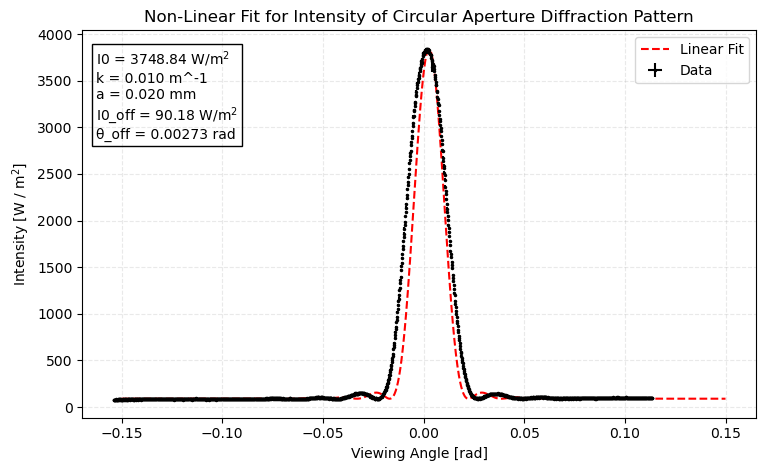

In [3]:
'''Function to calculate the intensity'''
def intensity(params: list, theta: float):
    I0, k, a, I0_off, theta_off = params
    arg = k * a * np.sin(theta - theta_off) * 10**6
    I = I0 * (2 * j1(arg) / arg)**2 + I0_off
    return I

'''Non-Linear scipy.odr curvefit'''
data = RealData(theta_list, intensity_list, theta_err, intensity_err)
model = Model(intensity)
pguess = [3918, 0.01, 0.02, 10, 0.01]
stpb = [10, 0.01, 0.01, 1, 0.01]
odr = ODR(data, model, pguess, stpb = stpb)
output = odr.run()
I0, I0_err = output.beta[0], output.sd_beta[0]
k, k_err = output.beta[1], output.sd_beta[1]
a, a_err = output.beta[2], output.sd_beta[2]
I0_off, I0_off_err = output.beta[3], output.sd_beta[3]
theta_off, theta_off_err = output.beta[4], output.sd_beta[4]
print(f'The best-fit max intensity is I0 = {I0:.2f} \u00B1 {I0_err:.2f}W/m^2.')
print(f'The best-fit wavenumber is k = {k:.3f} \u00B1 {k_err:.3f}mm^-1.')
print(f'The best-fit aperture radius is a = {a:.3f} \u00B1 {a_err:.3f}mm.')
print(f'The best-fit max intensity offset is I0_off = {I0_off:.2f} \u00B1 {I0_off_err:.2f}W/m^2.')
print(f'The best-fit theta offset is \u03B8_off = {theta_off:.5f} \u00B1 {theta_off_err:.5f}rad.')

'''Plot results'''
theta_points = np.linspace(-0.15, 0.15, len(intensity_list), endpoint = True)
text1 = f'I0 = {I0:.2f} W/m$^2$\nk = {k:.3f} m^-1\na = {a:.3f} mm'
text2 = f'\nI0_off = {I0_off:.2f} W/m$^2$\n\u03B8_off = {theta_off:.5f} rad'
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
fig.tight_layout(pad = 3)
ax.set_xlabel('Viewing Angle [rad]')
ax.set_ylabel('Intensity [W / m$^2$]')
ax.set_title('Non-Linear Fit for Intensity of Circular Aperture Diffraction Pattern')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.plot(theta_points, intensity([I0, k, a, I0_off, theta_off], theta_points), linestyle = 'dashed',
        color = 'red', label = 'Linear Fit')
ax.errorbar(theta_list, intensity_list, intensity_err, theta_err, markersize = 3,
            capsize = 0.01, fmt = 'k.', label = 'Data')
ax.legend(loc = 'upper right')
ax.annotate(text1 + text2, xy = (0.02, 0.95), xycoords = 'axes fraction', ha = 'left', va = 'top',
                         bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/Intensity_NonLinearFit.png')

#### Fresnel Diffraction of Straight Edge

##### Recorded data of the diffraction pattern from a 632.8nm wavelength HeNe laser with a razer blade aperture onto a CCD camera.  This data is averaged for 11 rows and then the horizontal distance across the viewing screen is calculated.

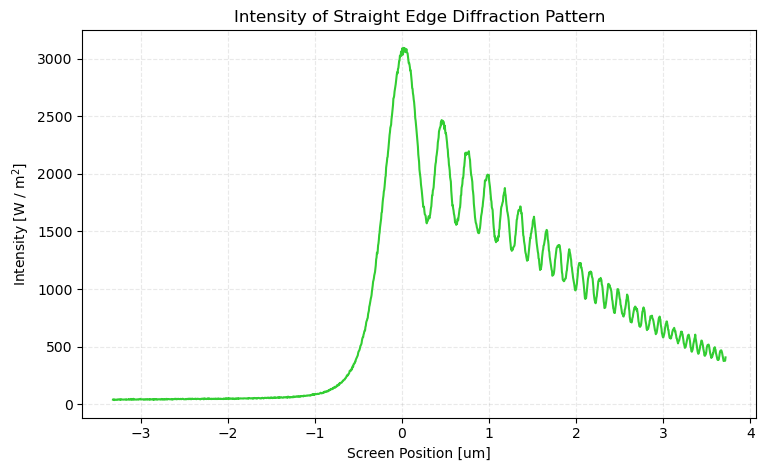

In [4]:
'''Reported data'''
intensity_df = pd.read_csv('FresnelStraightEdge.csv', header = None)

'''Find row with maximum intensity'''
max_intensity = intensity_df.max().max()                                 #maximum intensity [W / m**2]
index = intensity_df[intensity_df == max_intensity].stack().index[0][0]  #boolean mask equal to maximum intensity

'''Calculate average and standard error of each column for 11 rows centered at row_index'''
intensity_list = [intensity_df[col].iloc[index - 5 : index + 5].mean() for col in intensity_df.columns[:-1]]

'''Calculate distance across screen'''
dist_list = [-3.32 + 0.0044 * num for num in range(len(intensity_list))]

'''Plot results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
fig.tight_layout(pad = 3)
ax.set_xlabel('Screen Position [um]')
ax.set_ylabel('Intensity [W / m$^2$]')
ax.set_title('Intensity of Straight Edge Diffraction Pattern')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.plot(dist_list, intensity_list, linestyle = 'solid', color = 'limegreen')

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/Intensity_StraightEdge.png')